<a href="https://colab.research.google.com/github/JibrilTheUltimateFlugel/TensorflowTest/blob/main/TensorflowCNNfromScratchVer2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import os
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
import matplotlib.pyplot as plot
from keras.datasets import cifar10

In [2]:
(train_img, train_lab), (test_img, test_lab) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [3]:
print(train_img.shape)
print(test_img.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [6]:
train_img = train_img/255.0
test_img = test_img/255.0

In [7]:
#Ver 2.0 Using tf.data.Dataset and batching as well as shuffling
train_dataset = tf.data.Dataset.from_tensor_slices((train_img,train_lab))
train_dataset = train_dataset.shuffle(50000).batch(32)

test_dataset = tf.data.Dataset.from_tensor_slices((test_img,test_lab))
test_dataset = test_dataset.shuffle(10000).batch(32)

In [8]:
model = Sequential()
model.add(Conv2D(64,(3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128,(3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [9]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [10]:
#Now use the datasets to fit to the model!
history = model.fit(train_dataset,epochs=10,validation_data=(test_dataset))
model.save('cnnfromscratch.h5')

Epoch 1/10
1563/1563 [==============================] - 48s 4ms/step - loss: 1.6830 - accuracy: 0.3818 - val_loss: 1.2716 - val_accuracy: 0.5365
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1535 - accuracy: 0.5930 - val_loss: 0.9972 - val_accuracy: 0.6520
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9915 - accuracy: 0.6553 - val_loss: 0.9669 - val_accuracy: 0.6683
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8970 - accuracy: 0.6877 - val_loss: 0.9244 - val_accuracy: 0.6813
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8392 - accuracy: 0.7093 - val_loss: 0.8608 - val_accuracy: 0.7061
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7742 - accuracy: 0.7298 - val_loss: 0.8361 - val_accuracy: 0.7156
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7333 - accuracy: 0.7443 - val_loss: 0.8546 - val_accur

In [14]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	plot.subplot(211)
	plot.title('Cross Entropy Loss')
	plot.plot(history.history['loss'], color='blue', label='train')
	plot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	plot.subplot(212)
	plot.title('Classification Accuracy')
	plot.plot(history.history['accuracy'], color='blue', label='train')
	plot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	#filename = sys.argv[0].split('/')[-1]
	#pyplot.savefig(filename + '_plot.png')
	#pyplot.close()

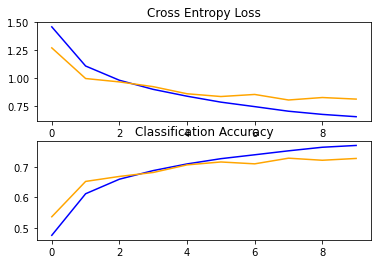

In [15]:
summarize_diagnostics(history)

In [16]:
#Evaluating the model
loss, accuracy = model.evaluate(train_dataset)
print("Loss:", loss)
print("Accuracy:", accuracy)

1563/1563 [==============================] - 9s 5ms/step - loss: 0.5080 - accuracy: 0.8297
Loss: 0.5080166459083557
Accuracy: 0.8297200202941895


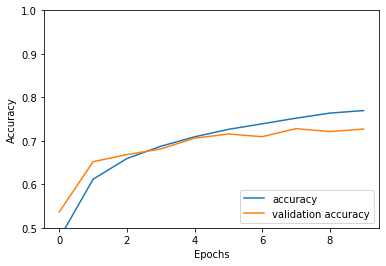

In [18]:
plot.plot(history.history['accuracy'], label='accuracy') 
plot.plot(history.history['val_accuracy'], label='validation accuracy')
plot.xlabel('Epochs')
plot.ylabel('Accuracy')
plot.ylim([0.5,1])
plot.legend(loc = 'lower right')

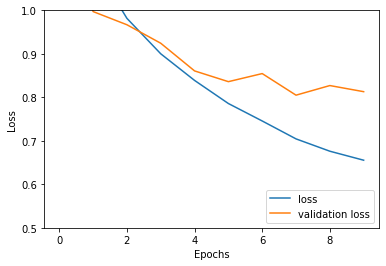

In [19]:
plot.plot(history.history['loss'], label='loss') 
plot.plot(history.history['val_loss'], label='validation loss')
plot.xlabel('Epochs')
plot.ylabel('Loss')
plot.ylim([0.5,1])
plot.legend(loc = 'lower right')